In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
categorial_cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in categorial_cols:
    print(df[col].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


Encoding  

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Visualize the data**

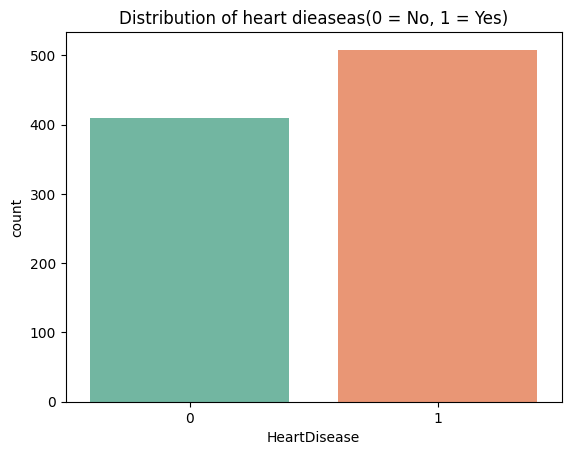

In [11]:
sns.countplot(x='HeartDisease',data=df,palette='Set2')
plt.title('Distribution of heart dieaseas(0 = No, 1 = Yes)')
plt.show()

**Age distribution**

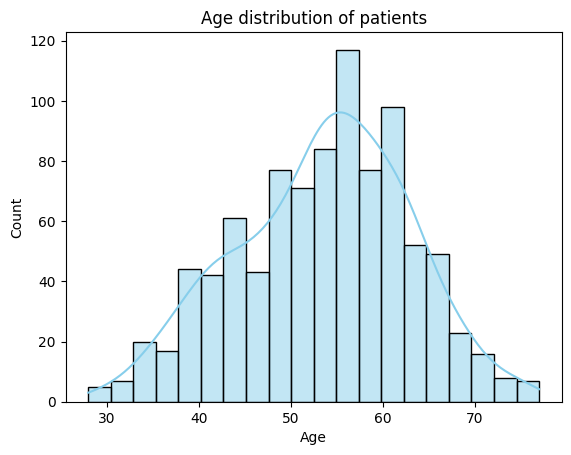

In [12]:
import warnings
warnings.filterwarnings("ignore")
sns.histplot(df['Age'],bins=20,kde = True,color ='skyblue')
plt.title('Age distribution of patients')
plt.show()

**Chest pain Type vs Heart Disease**

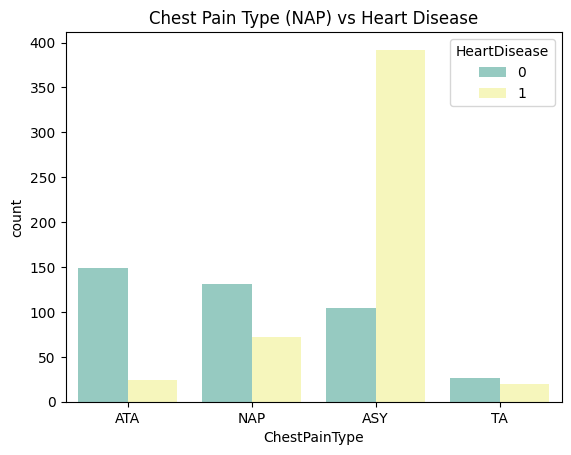

In [13]:
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Set3')
plt.title("Chest Pain Type (NAP) vs Heart Disease")
plt.show()


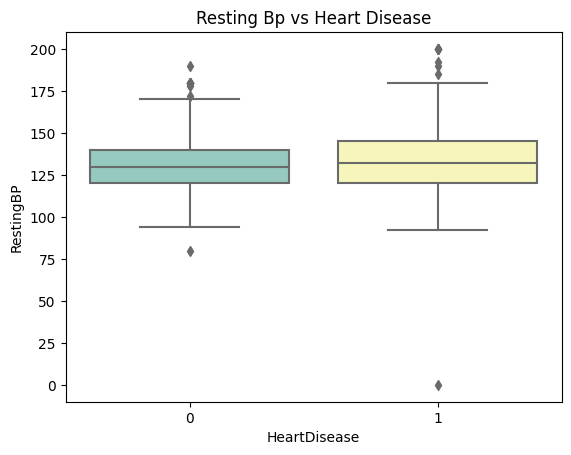

In [14]:
sns.boxplot(x='HeartDisease',y='RestingBP',data=df,palette='Set3')
plt.title('Resting Bp vs Heart Disease')
plt.show()

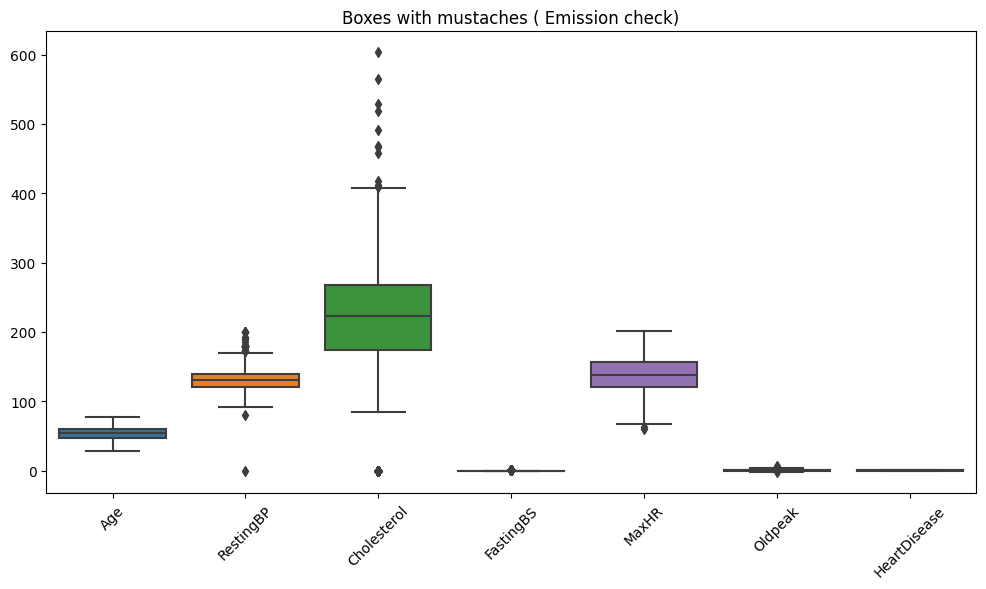

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation = 45)
plt.title('Boxes with mustaches ( Emission check)')
plt.show()

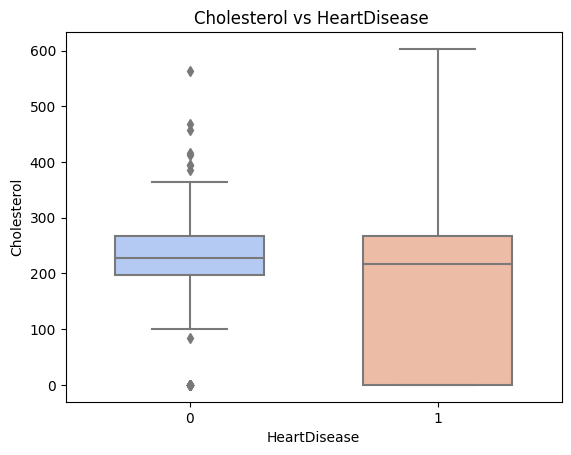

In [16]:
sns.boxplot(x='HeartDisease',y='Cholesterol',data=df,palette='coolwarm',width=0.6)
plt.title('Cholesterol vs HeartDisease ')
plt.show()

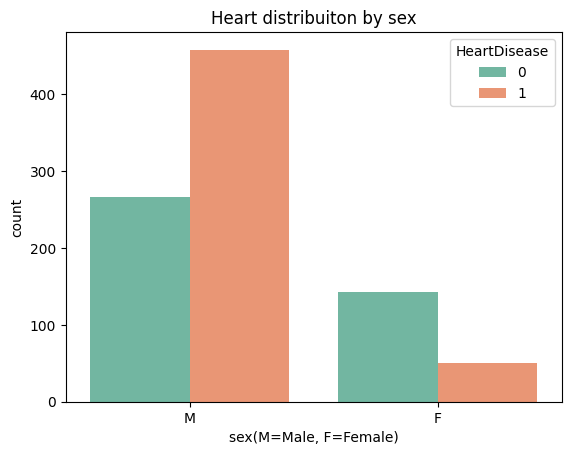

In [17]:
sns.countplot(data=df,x='Sex',hue='HeartDisease',palette='Set2')
plt.title('Heart distribuiton by sex')
plt.xlabel('sex(M=Male, F=Female)')
plt.ylabel('count')
plt.show()

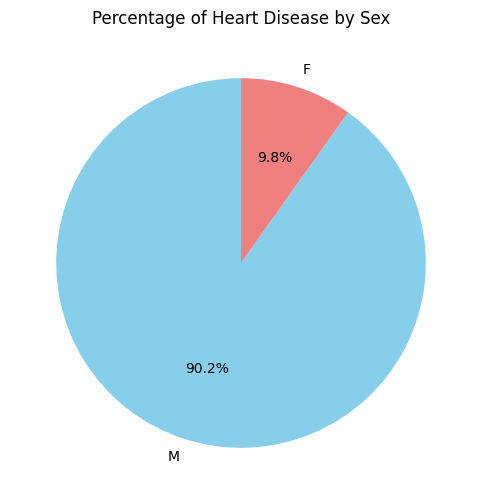

In [18]:

# Create a subset with only people who have HeartDisease
heart_df = df[df['HeartDisease'] == 1]

# Count males vs females with heart disease
sex_counts = heart_df['Sex'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['skyblue','lightcoral'])
plt.title("Percentage of Heart Disease by Sex")
plt.show()


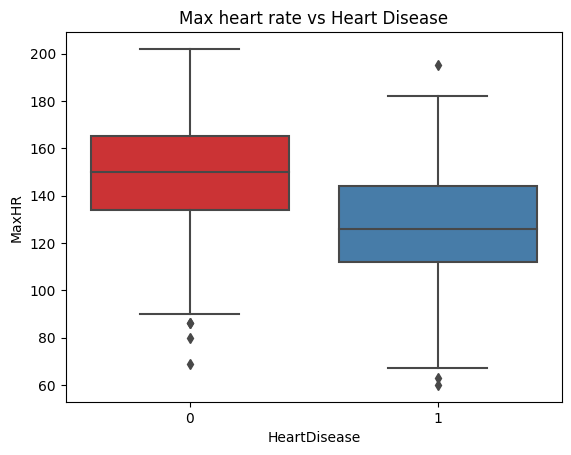

In [19]:
sns.boxplot(x='HeartDisease',y='MaxHR',data = df,palette ='Set1')
plt.title('Max heart rate vs Heart Disease')
plt.show()

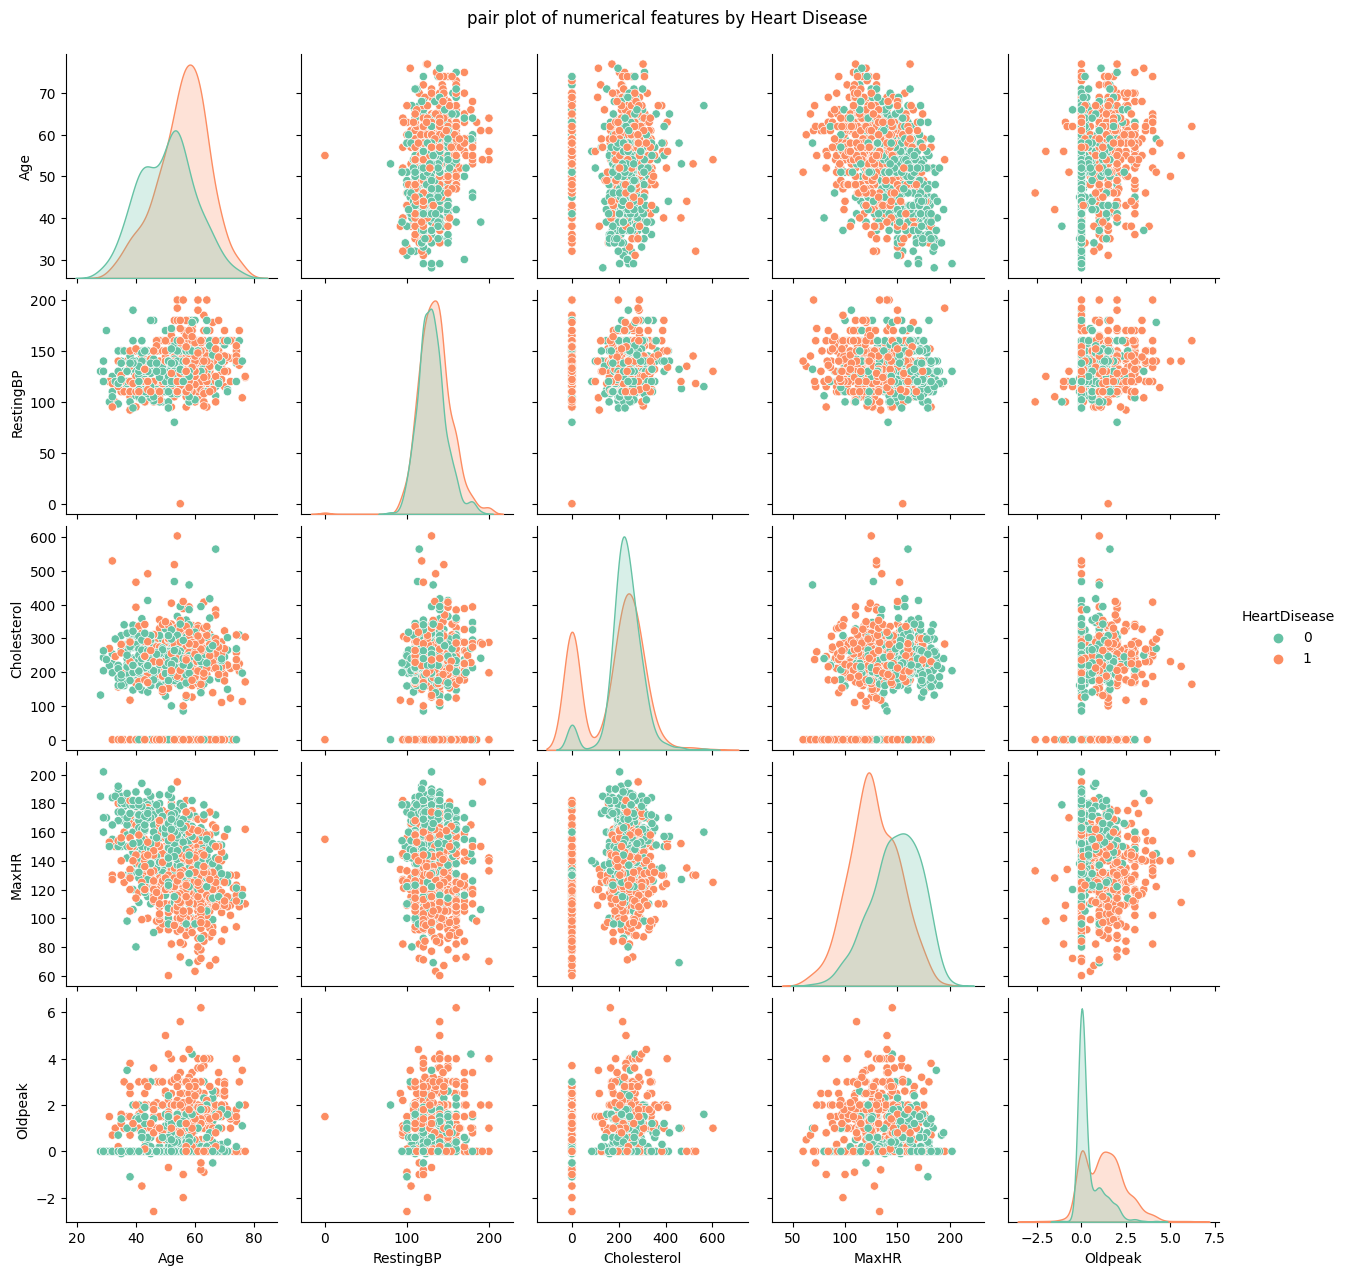

In [20]:
num_cols =['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
sns.pairplot(df[num_cols],hue='HeartDisease',palette='Set2',diag_kind = 'kde')
plt.suptitle('pair plot of numerical features by Heart Disease',y=1.02)
plt.show()

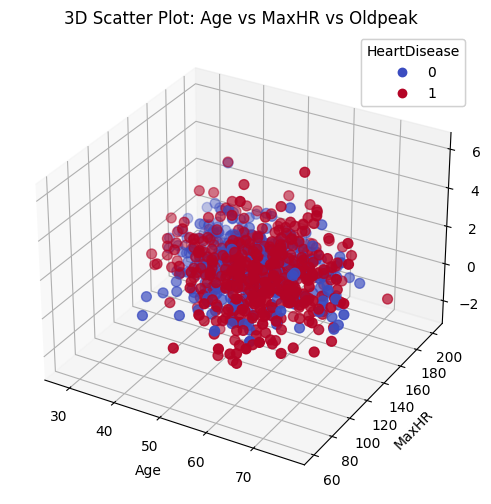

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# plot points 
scatter = ax.scatter(df['Age'], df['MaxHR'], df['Oldpeak'], c=df['HeartDisease'], cmap='coolwarm', s=50)

# Axis labels
ax.set_xlabel('Age')
ax.set_ylabel('MaxHR')
ax.set_zlabel('Oldpeak')
ax.set_title("3D Scatter Plot: Age vs MaxHR vs Oldpeak")

# Legend for HeartDisease
legend = ax.legend(*scatter.legend_elements(), title="HeartDisease")
ax.add_artist(legend)

plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

# label encode binary columns
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])

# one-hot encode multi-category columns 
df = pd.get_dummies(df,columns=['ChestPainType', 'RestingECG', 'ST_Slope'],drop_first=True )
print(df.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0             0               True              False   
1      1.0             1              False               True   
2      0.0             0               True              False   
3      1.5             1              False              False   
4      0.0             0              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0             False               True          False          False   
1             False 

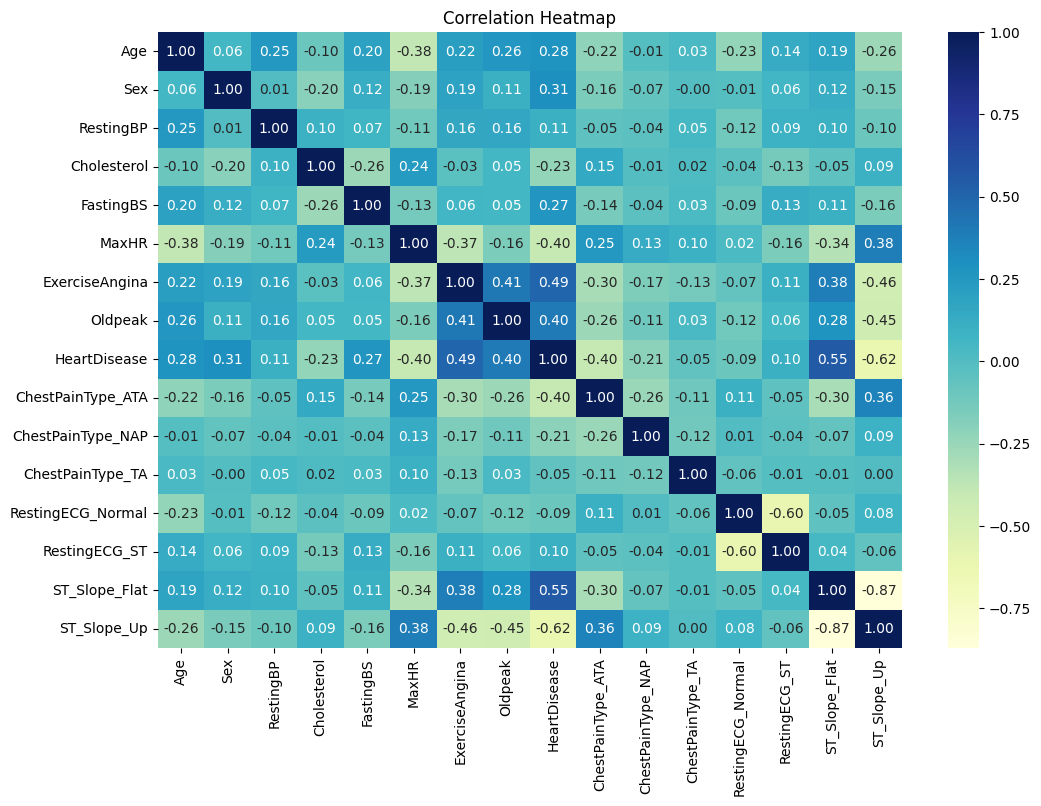

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**split data and build model**

In [24]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((734, 15), (184, 15), (734,), (184,))

In [27]:
# feature scaling 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)


In [28]:
from sklearn.linear_model import LogisticRegression 


model= LogisticRegression()
model.fit(x_train_scaled,y_train)



LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_test_pred=model.predict(x_test_scaled)
y_train_pred=model.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report',classification_report(y_test,y_test_pred))
print('classification report',classification_report(y_train,y_train_pred))


accuracy: 0.8858695652173914
accuracy: 0.8623978201634878
classification report               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

classification report               precision    recall  f1-score   support

           0       0.86      0.83      0.84       328
           1       0.86      0.89      0.88       406

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734



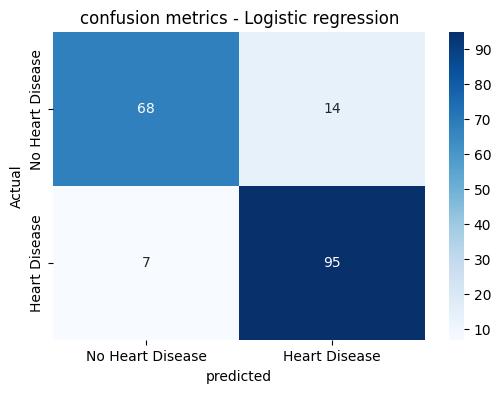

In [30]:
cm =confusion_matrix(y_test,y_test_pred)

#plot confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No Heart Disease', 'Heart Disease'],yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('confusion metrics - Logistic regression')
plt.show()

**MODEL-SVM**

In [31]:
from sklearn.svm import SVC

# train svm model 
model =SVC(kernel='rbf', C=2, gamma='scale', probability=True, random_state=42)
model.fit(x_train_scaled,y_train)

SVC(C=2, probability=True, random_state=42)

In [32]:
y_test_pred=model.predict(x_test_scaled)
y_train_pred=model.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report',classification_report(y_test,y_test_pred))
print('classification report',classification_report(y_train,y_train_pred))


accuracy: 0.9021739130434783
accuracy: 0.9155313351498637
classification report               precision    recall  f1-score   support

           0       0.93      0.84      0.88        82
           1       0.88      0.95      0.92       102

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

classification report               precision    recall  f1-score   support

           0       0.93      0.87      0.90       328
           1       0.90      0.95      0.93       406

    accuracy                           0.92       734
   macro avg       0.92      0.91      0.91       734
weighted avg       0.92      0.92      0.92       734



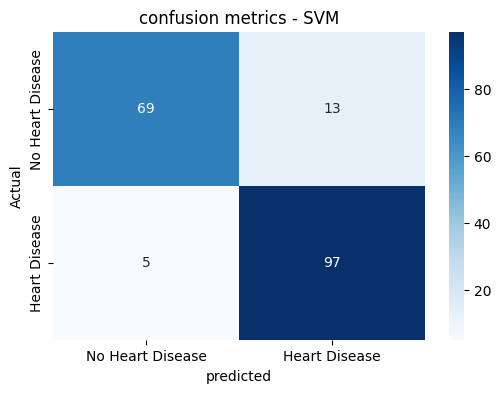

In [33]:
cm =confusion_matrix(y_test,y_test_pred)

#plot confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No Heart Disease', 'Heart Disease'],yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('confusion metrics - SVM')
plt.show()

**USE-KNN MODEL**

In [34]:
from sklearn.neighbors import KNeighborsClassifier

#create model 
model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2, leaf_size=35)
model.fit(x_train_scaled,y_train)

KNeighborsClassifier(leaf_size=35)

In [35]:
y_test_pred=model.predict(x_test_scaled)
y_train_pred=model.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report',classification_report(y_test,y_test_pred))
print('classification report',classification_report(y_train,y_train_pred))


accuracy: 0.8913043478260869
accuracy: 0.8910081743869209
classification report               precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

classification report               precision    recall  f1-score   support

           0       0.89      0.86      0.88       328
           1       0.89      0.91      0.90       406

    accuracy                           0.89       734
   macro avg       0.89      0.89      0.89       734
weighted avg       0.89      0.89      0.89       734



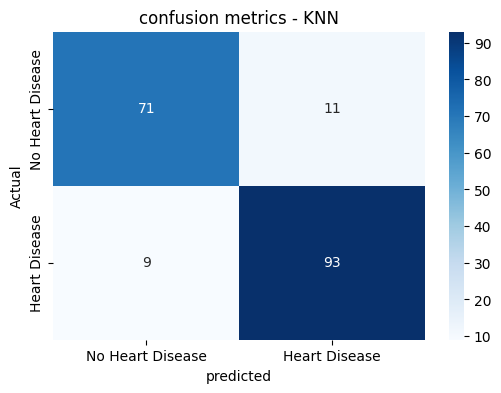

In [36]:
cm =confusion_matrix(y_test,y_test_pred)

#plot confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No Heart Disease', 'Heart Disease'],yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('confusion metrics - KNN')
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier

#create and train Random forest 
model=RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=2,min_samples_leaf=4)
model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4)

In [38]:
y_test_pred=model.predict(x_test_scaled)
y_train_pred=model.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report',classification_report(y_test,y_test_pred))
print('classification report',classification_report(y_train,y_train_pred))


accuracy: 0.8478260869565217
accuracy: 0.8828337874659401
classification report               precision    recall  f1-score   support

           0       0.85      0.80      0.83        82
           1       0.85      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184

classification report               precision    recall  f1-score   support

           0       0.90      0.83      0.86       328
           1       0.87      0.93      0.90       406

    accuracy                           0.88       734
   macro avg       0.89      0.88      0.88       734
weighted avg       0.88      0.88      0.88       734



**Use-GridsearchCV-FOR-Hyperparameter-tuning**

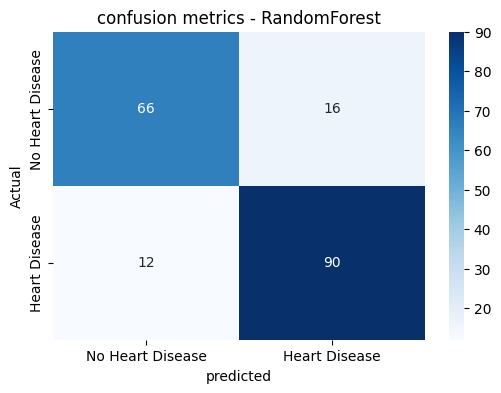

In [39]:
cm =confusion_matrix(y_test,y_test_pred)

#plot confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No Heart Disease', 'Heart Disease'],yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('confusion metrics - RandomForest')
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(x_train_scaled, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy: 0.8664523343584009


In [41]:

pip install xgboost            

Note: you may need to restart the kernel to use updated packages.


In [42]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=300,      
    max_depth=3,          
    learning_rate=0.03,   
    subsample=0.7,        
    colsample_bytree=0.7,  
    gamma=2,               
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [43]:
y_test_pred=model.predict(x_test_scaled)
y_train_pred=model.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report',classification_report(y_test,y_test_pred))
print('classification report',classification_report(y_train,y_train_pred))


accuracy: 0.842391304347826
accuracy: 0.9141689373297003
classification report               precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.84      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

classification report               precision    recall  f1-score   support

           0       0.92      0.89      0.90       328
           1       0.91      0.93      0.92       406

    accuracy                           0.91       734
   macro avg       0.91      0.91      0.91       734
weighted avg       0.91      0.91      0.91       734



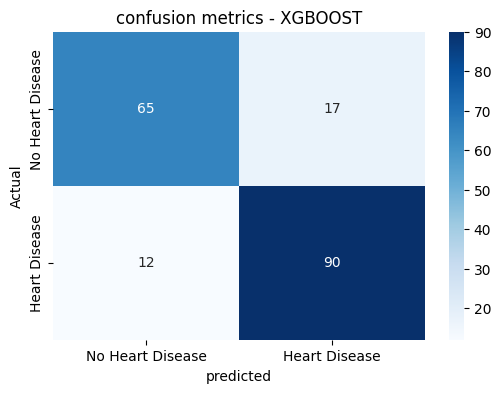

In [44]:
cm =confusion_matrix(y_test,y_test_pred)

#plot confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No Heart Disease', 'Heart Disease'],yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('confusion metrics - XGBOOST')
plt.show()

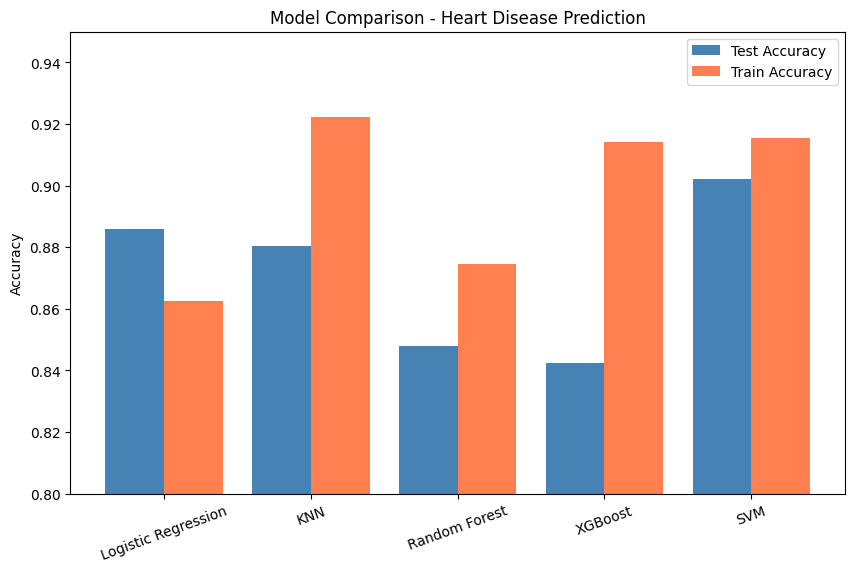

In [45]:
import matplotlib.pyplot as plt

# Updated accuracies
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost', 'SVM']
test_accuracies = [0.8859, 0.8804, 0.8478, 0.8423, 0.9021]
train_accuracies = [0.8624, 0.9223, 0.8747, 0.9141, 0.9155]

x = range(len(model_names))
plt.figure(figsize=(10,6))
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', color='steelblue')
plt.bar([i+0.4 for i in x], train_accuracies, width=0.4, label='Train Accuracy', color='coral')

plt.xticks([i+0.2 for i in x], model_names, rotation=20)
plt.ylim(0.80, 0.95)
plt.ylabel('Accuracy')
plt.title('Model Comparison - Heart Disease Prediction')
plt.legend()
plt.show()
